In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

## Chi2 analysis
This test is applied to acertain wether frequencies of events (values of a categorical variable) follows a specific distribution.

This test can also be used to test for independence of two categorical variables.

In [2]:
clothes = pd.read_csv('C:/Users/MANU/Desktop/Datasets/womens ecommerce clothing reviews/Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [3]:
clothes.shape

(23486, 10)

In [4]:
clothes.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
# renaming the columns to more pythonic names
clothes_cols = [x.replace(" ", "_") for x in clothes.columns]
clothes.columns = [x.lower() for x in clothes_cols]

clothes.head()

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


We are interested in the 'rating' and 'recommended_ind' columns which indicate the average rating for the product and if the e-commerce site has a recommendation for the product or not.

In [6]:
# Selecting the columns to work with
eclothes = clothes[['rating', 'recommended_ind']]
eclothes.head()

,rating,recommended_ind
0,4,1
1,5,1
2,3,0
3,5,1
4,5,1


We will perform a chi2 analysis to see wether the recommendation made by the e-commerce site are independent of the rating associated with the product.

Let's plot a histogram to see how the different ratings are distributed.

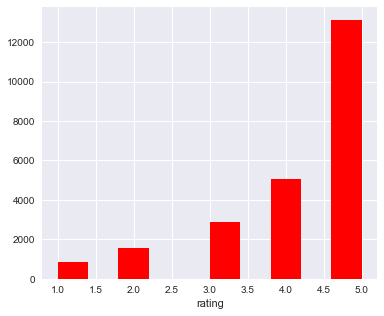

In [7]:
plt.figure(figsize=(6,5))
plt.hist(eclothes['rating'], color='red')
plt.xlabel('rating')
plt.show()

Observations:
1. Most of the products on the ecommerce site are highly rated with most having having ratings of over 3.5

Let's view the data we are working with in a tabular format.

The pd.crosstab function will give us a matrix representation of our data

In [8]:
tabular_data = pd.crosstab(eclothes['recommended_ind'], eclothes['rating'])
tabular_data

rating,1,2,3,4,5
recommended_ind,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13106


Observations:
1. Individual rows indicate recommended products and non-recommended products.
2. For each of these rows, there is a corresponding distibution of the rating.

We will use the dataframe we get from the crosstab function to calculate the chi2 statistic for our data.

In [9]:
chi2, p_value, degrees_of_freedom, expected_values = chi2_contingency(tabular_data.values)

Observations;
1. The chi2_contingency function calculates the chi2 statistic to test for the independence of two categorical variables

2. What we are trying to determine using this data is if recommendations are independent of ratings. Are the observed frequencies of ratings different across these categories?.

3. We have two categories of products, recommended and not recommended. The chi2 test will see the observed frequencies of ratings across these two different categories and see wether these observed frequencies for recommended products as well as the no-recommended products match the expected frequency. The expected frequency is frequency distribution of ratings across the entire dataset.


The chi2_contigency function returns four sets of information: chi2 statistic, p-value for that statistic, degrees of freedom and the expected value. 

The expected values give you how chi2 expects the data will be distributed if the recommended and not recommended independent values were independent of the ratings.

Lets have a look at the output values of the chi2_contigency function

In [10]:
print('The Chi2 statistic: {}'.format(chi2))
print('The Chi2 statistic p_value: {}'.format(p_value))
print('The degrees of freedom: {}'.format(degrees_of_freedom))

The Chi2 statistic: 16722.503172306744
The Chi2 statistic p_value: 0.0
The degrees of freedom: 4


The chi2 statistic is high with a low p-value. This means that this chi2 test was significant implying that the distribution as seen in the data was very different from the expected distribution for the recommended and not recommended products.

You can see that the degrees of freedom is equal to 4 i.e. the number of categories we are working with(5 rating categories) less 1. 


In [11]:
expected_values

array([[   149.57097846,    278.00306566,    509.99795623,    901.86681427,
          2332.56118539],
       [   692.42902154,   1286.99693434,   2361.00204377,   4175.13318573,
         10798.43881461]])

Lets put the expected values in a pandas DataFrame.

In [12]:
expected_df = pd.DataFrame({'0': expected_values[0], '1': expected_values[1]})

expected_df

,0,1
0,149.570978,692.429022
1,278.003066,1286.996934
2,509.997956,2361.002044
3,901.866814,4175.133186
4,2332.561185,10798.438815


Lets visualize these expectected values

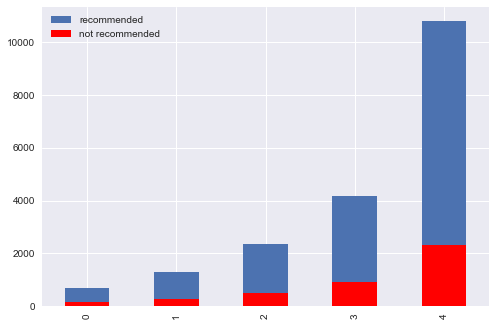

In [13]:
expected_df['1'].plot(kind='bar', label='recommended')
expected_df['0'].plot(kind='bar', label='not recommended', color='red')
plt.legend()
plt.show()

Lets visualize the observed values

In [14]:
ratings_recommended = eclothes[eclothes['recommended_ind'] == 1]
ratings_not_recommended = eclothes[eclothes['recommended_ind'] == 0]

In [16]:
ratings_recommended.shape, ratings_not_recommended.shape

((19314, 2), (4172, 2))

In [ ]:
ratings_recommended['rating'].plot(kind='bar', label='recommended')
ratings_not_recommended['rating'].plot(kind='bar', label='not_recommended', color='red')
plt.legend()
plt.show()